# Airline Stock Analysis

The objective of this Notebook is twofold:

(1) Discover if events of Sunday 09-APR impacted *United Airlines* stock price in the following week

(2) Implement a Moving Average algorithm to make *BUY/SELL* reccomendations based on a Simple Moving Average (SMA) strategy

In [1]:
# Import all the required packages
# The pandas_datareader library contains functions which allow us to call data from various internet sources
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

# Use Python's "magic" commands since we want to see the graphs within this notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Impact of 09-APR on United Airlines price

In [2]:
# Define our start and end variables to be used in DataReader function and then call a time series of data from Yahoo
# The datetime module allows us to define datetimes objects which can be passed as arguments to other functions

start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,4,24)
un = web.DataReader("UAL","yahoo",start, end)

In [3]:
# Check data looks as expected

un.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,74.019997,74.019997,72.150002,72.709999,2516000,72.709999
2017-01-04,72.449997,73.790001,72.449997,73.019997,2196800,73.019997


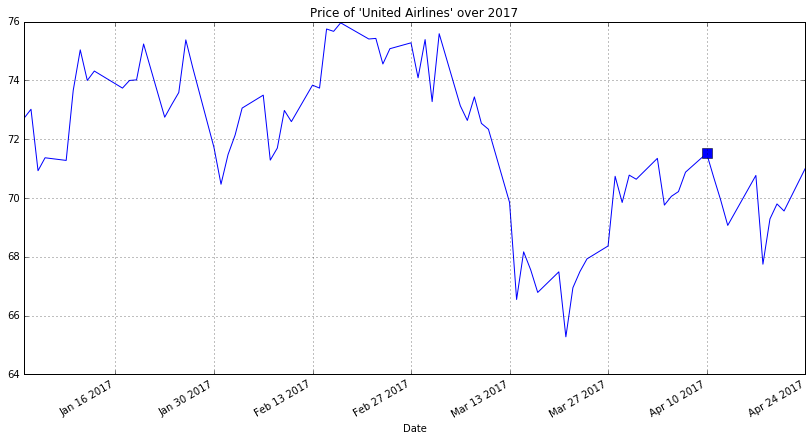

In [4]:
# Modify the rcParams to control the size of the graph
# The figure.figsize controls in the figure size in inches
# Also add a Title and a marker for 10-APR

pylab.rcParams["figure.figsize"] = (14,7)

markers_on = [(un.index.get_loc("2017-04-10"))]
marker = 's' # The "s" is for Square
title = "Price of 'United Airlines' over 2017" 
fig = un["Adj Close"].plot(grid=True, title = title, markevery = markers_on, marker = marker, markersize=10)

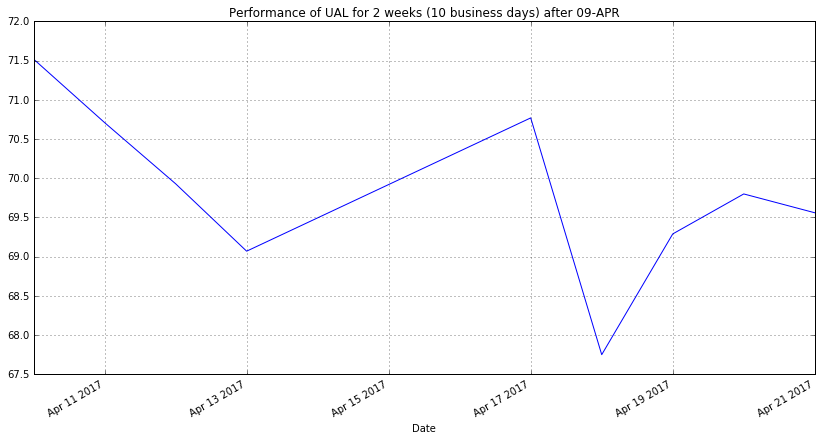

In [5]:
# Zoom in on the two weeks after 09-APR

start = datetime.datetime(2017,4,10)
end = datetime.datetime(2017,4,21)
title = "Performance of UAL for 2 weeks (10 business days) after 09-APR"
un_weekafter = web.DataReader("UAL","yahoo",start, end)
un_weekafter["Adj Close"].plot(grid=True, title = title)

In [6]:
# Create a new DataFrame showing the Closing Price of "United Airlines" versus 3 competitors
# https://en.wikipedia.org/wiki/List_of_largest_airlines_in_North_America
# Also add in the SandP 500 as a benchmark

# United Airlibes = UAL
# American Airlines = AAL
# Delta Airlines = DAL
# Southwest Airlines = LUV


start = datetime.datetime(2017,4,10)
end = datetime.datetime(2017,4,21)

un = web.DataReader("UAL","yahoo",start, end)
aa = web.DataReader("AAL","yahoo",start, end)
da = web.DataReader("DAL","yahoo",start, end)
sw = web.DataReader("LUV","yahoo",start, end)
snp = web.DataReader("GSPC","yahoo",start, end)

stocks = pd.DataFrame({"UAL" : un["Adj Close"],
                    "AAL" : aa["Adj Close"],
                    "DAL" : da["Adj Close"],
                    "LUV" : sw["Adj Close"],
                    "SNP" : snp["Adj Close"]
                      })

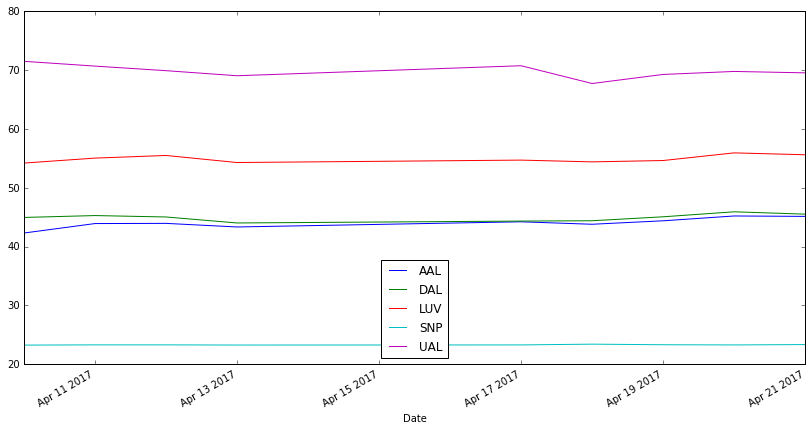

In [7]:
#Plot the results of the stock performance
#This graph doesn't tell us much
#It would be better to look at returns over the time period rather than absolute nominal performance

stocks.plot()

In [8]:
#Compute the daily returns since 04-10-2017 so we can compare the data
#The Apply Applies function along input axis of DataFrame.
#Python supports the creation of anonymous functions (i.e. functions that are not bound to a name) at runtime, 
#using a construct called "lambda"

stock_returns = stocks.apply(lambda x: x / x[0])
stock_returns.head(5)
    
    

,AAL,DAL,LUV,SNP,UAL
Date,,,,,
2017-04-10,1.000000,1.000000,1.000000,1.00000,1.000000
2017-04-11,1.038043,1.007116,1.015492,1.00172,0.988675
2017-04-12,1.038752,1.001779,1.023792,1.00172,0.977768
2017-04-13,1.024338,0.979097,1.001660,1.00043,0.965744
2017-04-17,1.045132,0.986213,1.009222,1.00129,0.989513


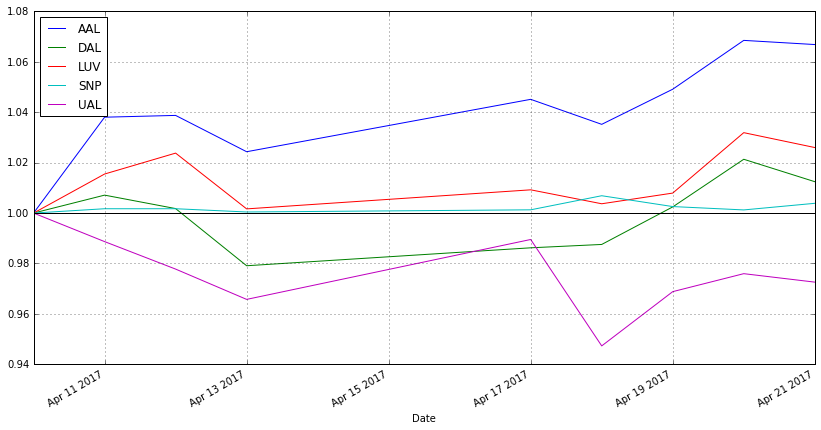

In [9]:
stock_returns.plot(grid = True).axhline(y = 1, color = "black", lw = 1)

#### Golden Cross Trading Algo

Next we want to implement some Python code, which will make BUY/SELL recomendations based on a **Simple Moving Average (SMA)** strategy

From investopedia:

*"The golden cross is a bullish breakout pattern formed from a crossover involving a security's short-term moving average (such as the 15-day moving average) breaking above its long-term moving average (such as 50-day moving average) or resistance level."*

In [10]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime.today()
un = web.DataReader("DAL","yahoo",start, end)
un["15d"] = np.round(un["Adj Close"].rolling(window = 15, center = False).mean(), 2)
un["50d"] = np.round(un["Adj Close"].rolling(window = 50, center = False).mean(), 2)

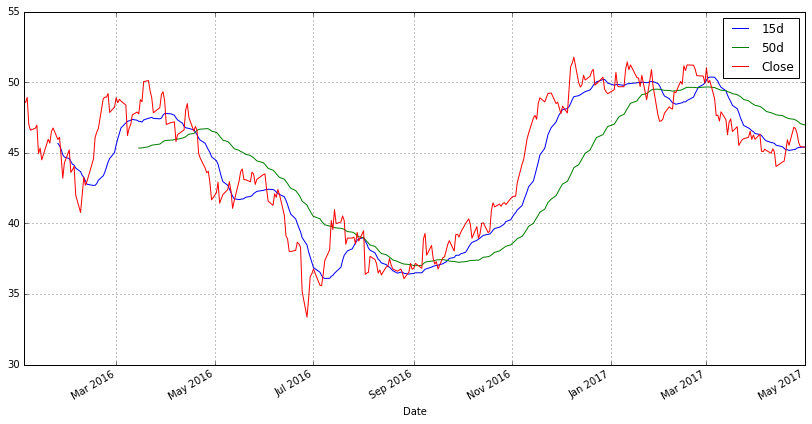

In [11]:
un_ma = un[['15d','50d','Close']]
un_ma.plot(grid = True)

In [12]:
def cross(ticker, start, end = datetime.datetime.today(), st=15, lt=50):
    
    data = web.DataReader(ticker,"yahoo",start,end)
    data["st_SMA"] = np.round(data["Adj Close"].rolling(window = st, center = False).mean(), 6)
    data["lt_SMA"] = np.round(data["Adj Close"].rolling(window = lt, center = False).mean(), 6)
    data = data[["st_SMA","lt_SMA"]]
    
    if (data.ix[-1,"st_SMA"]) > (data.ix[-1,"lt_SMA"]):
        return "Stock %s: Enter Market" % (ticker)
    else:
        return "Stock %s: Warning, Exit Market" %(ticker)

In [13]:
print cross("DAL","2017-01-01")

Stock DAL: Warning, Exit Market


In [14]:
ticker = ["UAL","DAL","LUV","AAL","BLK"]

for i in ticker:
    print cross(i,"2017-01-01")

Stock UAL: Warning, Exit Market
Stock DAL: Warning, Exit Market
Stock LUV: Enter Market
Stock AAL: Enter Market
Stock BLK: Warning, Exit Market
